Histograms and Density Plots:

In [79]:
#Libraries Importing:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
from IPython.core.pylabtools import figsize

In [80]:
#Data Importing:

flights = pd.read_csv('C:/Users/abhip/OneDrive/Desktop/Projects to be uploaded on github/Univariate Plots/univariate_dist/data/flights_1.csv')
carriers = pd.read_csv('C:/Users/abhip/OneDrive/Desktop/Projects to be uploaded on github/Univariate Plots/univariate_dist/data/by_carrier.csv')
airlines = pd.read_csv('C:/Users/abhip/OneDrive/Desktop/Projects to be uploaded on github/Univariate Plots/univariate_dist/data/airlines.csv')
flights = flights[['arr_delay', 'carrier']]

flights.head(5)

,arr_delay,carrier
0,11.0,UA
1,20.0,UA
2,33.0,AA
3,-18.0,B6
4,-25.0,DL


The flight arrival with negative values means that the flights were early.

In [81]:
#Checking for data between -100 to 80 min:
flights = flights[flights['arr_delay'].between(-100,50)]
flights.head(10)

,arr_delay,carrier
0,11.0,UA
1,20.0,UA
2,33.0,AA
3,-18.0,B6
4,-25.0,DL
5,12.0,UA
6,19.0,B6
7,-14.0,EV
8,-8.0,B6
9,8.0,AA


In [82]:
flights['arr_delay'].describe()

count    293728.000000
mean         -4.876546
std          19.456812
min         -86.000000
25%         -18.000000
50%          -7.000000
75%           6.000000
max          50.000000
Name: arr_delay, dtype: float64

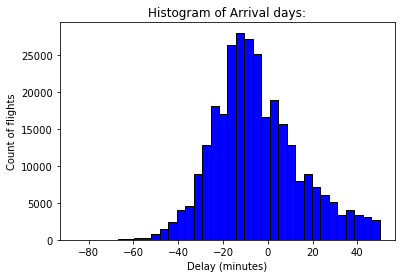

In [83]:
# Histogram of all arrival delays

#Matplolib implementation:
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5)) #Bins denotes that bins are of 5 minutes
#Adding labels:

plt.title('Histogram of Arrival days:')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count of flights')

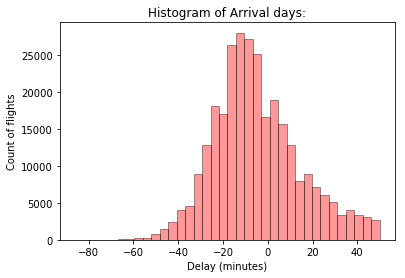

In [84]:
#Seaborn Implementation:

sns.distplot(flights['arr_delay'], hist = True,
            kde = False, bins = int(180/5),
            color = 'red', hist_kws = {'edgecolor':'black'})

#Adding labels:

plt.title('Histogram of Arrival days:')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count of flights')

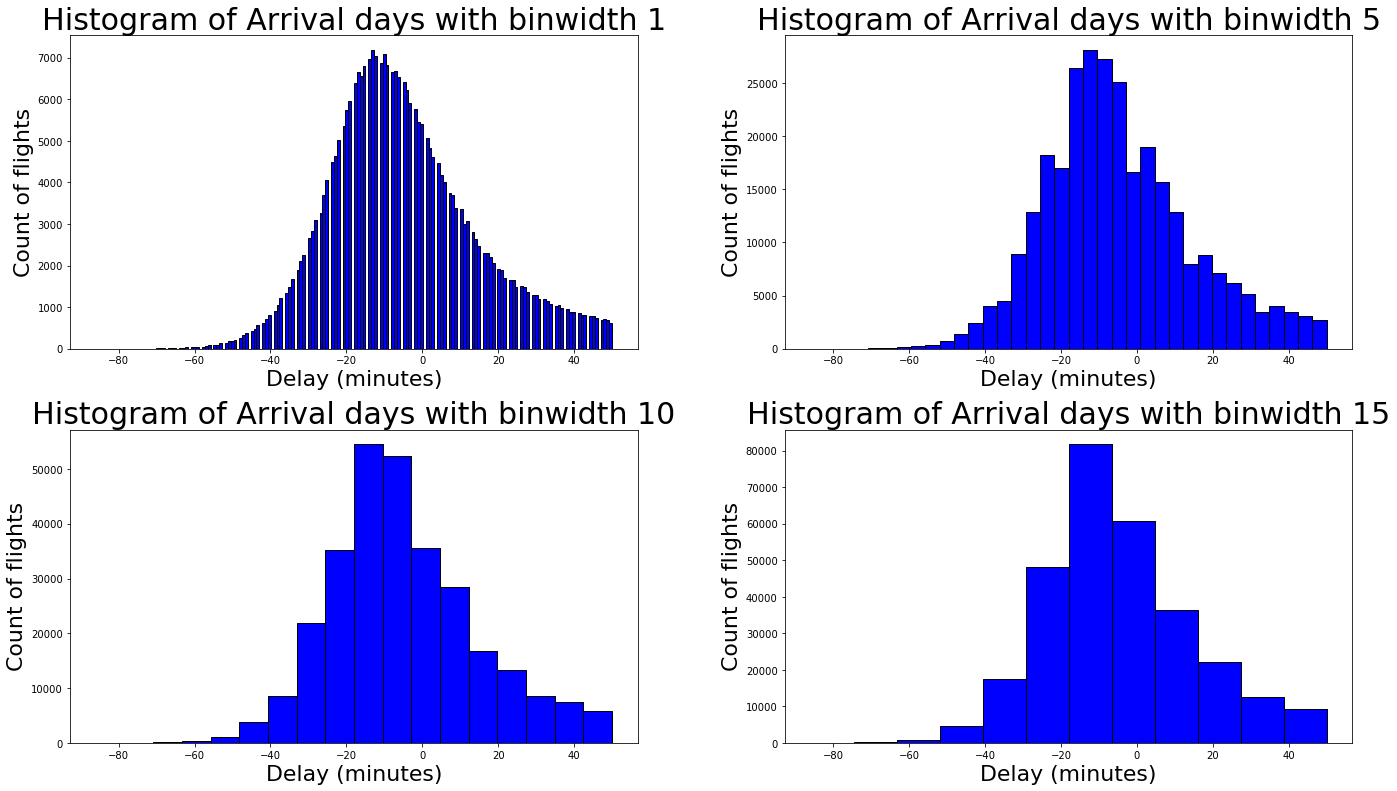

In [85]:
#Choosing the right binwidth that will decide the number of bins in the plot:

figsize(20,16)
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    #Setup the plots:
    ax = plt.subplot(3, 2, i + 1)
    
    #Drawing the plot:
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
            color = 'blue', edgecolor = 'black') #Bins denotes that bins are of 5 minutes
#Adding labels:

    ax.set_title('Histogram of Arrival days with binwidth %d' %binwidth, size = 30)
    ax.set_xlabel('Delay (minutes)', size = 22)
    ax.set_ylabel('Count of flights', size = 22)

plt.tight_layout()
plt.show()

Histograms work pretty well when plotting for a single variable but they fail
when it comes for displaying multiple categories

In [96]:
#Ex: If we want to compare arrival delays with airlines
#The histogram plot would fail

#Extract top 5 airlines with most flights:
carrier_flights = pd.Series(flights.groupby('carrier')['carrier'].count().sort_values(ascending = False))
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['carrier'].isin(top_five)]

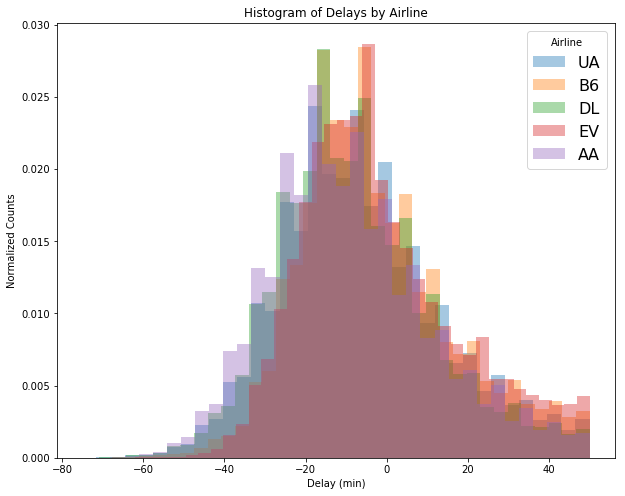

In [97]:
figsize(10,8)
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['carrier'] == airline]
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline')
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Counts')
    

The plot is not very helpful. All the overlapping bars make it impossible to make
out anything of the graph

Sloution 1:
Side by side graph:

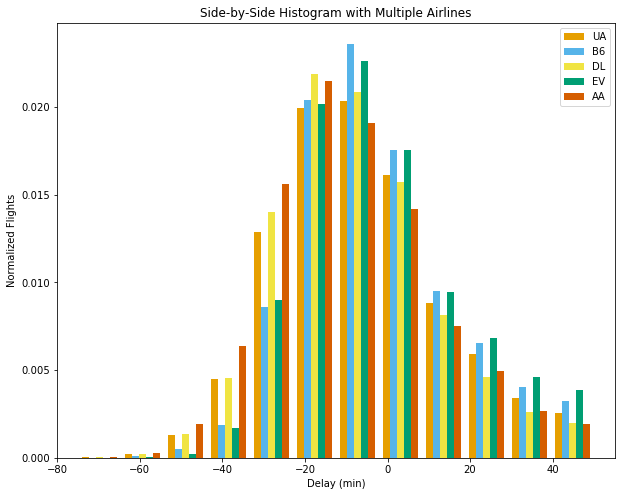

In [98]:
#Make a separate list for each airline:

x1 = list(flights[flights['carrier'] == 'UA']['arr_delay'])
x2 = list(flights[flights['carrier'] == 'B6']['arr_delay'])
x3 = list(flights[flights['carrier'] == 'DL']['arr_delay'])
x4 = list(flights[flights['carrier'] == 'EV']['arr_delay'])
x5 = list(flights[flights['carrier'] == 'AA']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['UA', 'B6', 'DL', 'EV', 'AA']

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

Solution 2: Stacked bars:

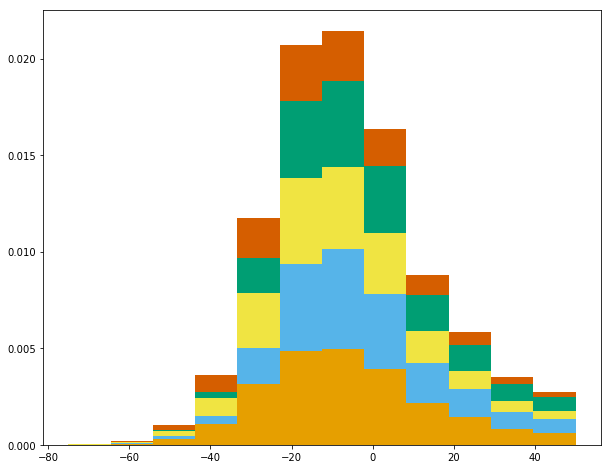

In [100]:
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names)

plt.show()

This bar is also not very informative
At a delay of -20 to 0 minutes, does UA or AA have a larger size of the bar? 
I can’t tell and viewers won’t be able to either.

A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point).

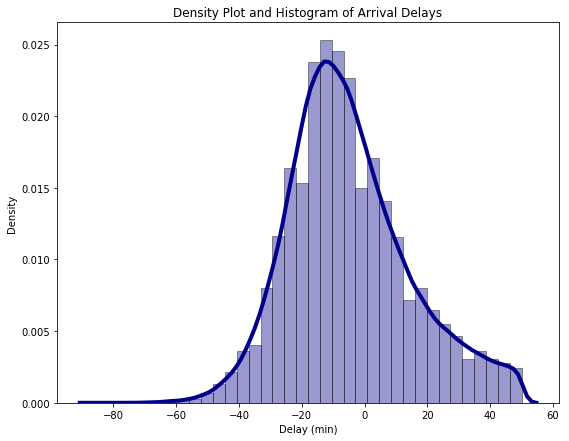

In [101]:
#Density Plot:


figsize(9, 7)

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

plt.title('Density Plot and Histogram of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

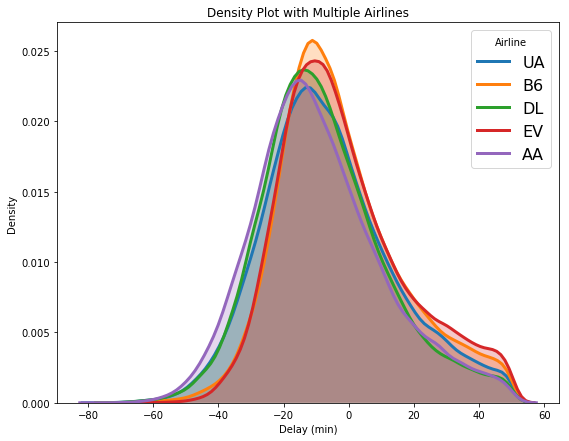

In [104]:
airlines = ['UA', 'B6', 'DL', 'EV', 'AA']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['carrier'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade': True,},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')


Using the above graph we come to the conclusion that all these airlines have nearly identical arrival delay distributions! However, there are other airlines in the dataset, and we can plot one that is a little different to illustrate another optional parameter for density plots, shading the graph.